# ¿Cuál es la mejor tarifa?

## Descripción del proyecto
---

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Objetivo
El objetivo de este proyecto es evaluar el comportamiento de los clientes y determinar cuál tarifa de Megaline es más rentable.

Las acciones a realizar: 
- Paso 1: Cargar y explorar los datos
- Paso 2: Manipulación de datos
- Paso 3: Análisis de datos
- Paso 4: Pruebas de hipótesis
- Paso 5: Conclusiones

## Cargar y explorar los datos
---

En este paso, cargaremos el ambiente de trabajo y los datos; realizaremos una exploración inicial que incluye la verificación del tamaño del dataset, los tipos de columnas y si hay valores faltantes o atípicos. 

### Cargar ambiente

In [417]:
## Cargar el ambiente de trabajo
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st

### Cargar datasets

In [418]:
# Cargar los datos en diferentes DataFrames

## Usuarios
df_users= pd.read_csv("/datasets/megaline_users.csv")

## Llamadas
df_calls= pd.read_csv("/datasets/megaline_calls.csv")

## Mensajes
df_messages= pd.read_csv("/datasets/megaline_messages.csv")

## Tráfico de datos
df_internet= pd.read_csv("/datasets/megaline_internet.csv")

## Tarifas
df_plans= pd.read_csv("/datasets/megaline_plans.csv")

### Exploración de datasets

#### Inspección de la base de datos **`users`**

In [419]:
## Visualización del df
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [420]:
## Información general 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [421]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_users.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated()])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [422]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_users.duplicated(subset="user_id").sum())
print()

## Identificación de valores duplicados
print(df_users[df_users.duplicated(subset="user_id")])

0

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [423]:
## Valores faltantes
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [424]:
## Estadísticas descriptivas para columnas numéricas
round(df_users.describe(),2)

,user_id,age
count,500.00,500.00
mean,1249.50,45.49
std,144.48,16.97
min,1000.00,18.00
25%,1124.75,30.00
50%,1249.50,46.00
75%,1374.25,61.00
max,1499.00,75.00


In [425]:
## Estadísticas descriptivas para columnas categóricas
df_users.describe(include="object")

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Thompson,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-08,surf,2018-12-18
freq,3,3,80,5,339,3


El df de los usuarios de la compañia Megaline, contiene 500 observaciones con 8 variables. En este df se tiene información personal y datos relacionados con su interacción con la compañia. 

En cuanto a los errores que identificamos, se encuentran: 
- La variable `city` contiene otra información de la localidad del cliente. 
- Las variables `reg_date` y `churn_date` son de tipo objeto y no de tipo fecha. 
- La variable `churn_date` contiene 466 datos faltantes. 
- La variable `plan` puede ser más específico. 

En la base de datos no identificamos valores duplicados explícitos. Realizamos un análisis sobre los duplicados implícitos unicamente en la columna `user_id`, ya que se entiende no puede ser duplicado

De manera muy general podemos observar que los rangos de edades de los clientes varían desde los 18 años hasta los 75 años, siendo el promedio la edad de 46 años. El nombre más común es *Jasper* y el apellido más popular el *Caldwell*. Corroboramos que el usuario *Jasper Calwell* no se repitiera más de una vez. La gran mayoría de clientes tienen un plan del tipo `surf`.

#### Inspección de la base de datos **`calls`**

In [426]:
## Visualización del df
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [427]:
## Información general 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [428]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_calls.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [429]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_calls.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_calls[df_calls.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


In [430]:
## Valores faltantes
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [431]:
## Estadísticas descriptivas para columnas numéricas
round(df_calls.describe(),2)

,user_id,duration
count,137735.00,137735.00
mean,1247.66,6.75
std,139.42,5.84
min,1000.00,0.00
25%,1128.00,1.29
50%,1247.00,5.98
75%,1365.00,10.69
max,1499.00,37.60


In [432]:
## Estadísticas descriptivas para columnas categóricas
df_calls.describe(include="object")

,id,call_date
count,137735,137735
unique,137735,351
top,1084_3,2018-12-27
freq,1,1091


El df de las llamadas con la compañia Megaline, contiene 137,735 observaciones con 4 variables. En este df se tiene información sobre las llamadas que se realizaron en el año 2018. 

En cuanto a los errores que identificamos, se encuentran: 
- La variable `duration` no especifica las unidades de la información. 
- La variable `call_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id de la llamada. 

En la base de datos no identificamos valores duplicados explícitos. Realizamos un análisis sobre los duplicados implícitos unicamente en la columna `id`, ya que se entiende no puede ser duplicado. Tampoco identificamos valores ausentes en la base de datos. 

De manera muy general podemos observar que en promedio las llamadas tienen una duración de 6.75 minutos, estas varían desde 0 hasta los 37.60 minutos. El registro de las llamadas comienza desde el *15 de enero del 2018* y termina el día *31 de diciembre del 2018*. Observamos que la fecha con mayor frecuencia es el *27 de diciembre del 2018*, es probable que estas llamadas estén relacionadas con las visperas de navidad y año nuevo.

#### Inspección de la base de datos **`messages`**

In [433]:
## Visualización del df
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [434]:
## Información general 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [435]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_messages.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [436]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_messages.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_messages[df_messages.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


In [437]:
## Valores faltantes
print(df_messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [438]:
## Estadísticas descriptivas para columnas categóricas
df_messages.describe(include="object")

,id,message_date
count,76051,76051
unique,76051,351
top,1046_114,2018-12-28
freq,1,702


El df de las mensajes con la compañia Megaline, contiene 76,051 observaciones con 3 variables. En este df se tiene información sobre los mensajes que se realizaron en el año 2018. 

En cuanto a los errores que identificamos, se encuentran: 
- La variable `message_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id del mensaje. 

En la base de datos no identificamos valores duplicados explícitos. Realizamos un análisis sobre los duplicados implícitos unicamente en la columna `id`, ya que se entiende no puede ser duplicado. Tampoco identificamos valores ausentes en la base de datos. 

De manera muy general podemos observar el registro de las llamadas comienza desde el *15 de enero del 2018* y termina el día *31 de diciembre del 2018*, siendo similar a la base de datos de las llamadas `df_calls`. Observamos que la fecha con mayor frecuencia es el *28 de diciembre del 2018*,siendo casi similar a la de las llamadas. Es probable que esta observación estén relacionadas con las visperas de navidad y año nuevo. 

#### Inspección de la base de datos **`internet`**

In [439]:
## Visualización del df
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [440]:
## Información general 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [441]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_internet.duplicated().sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated()])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [442]:
# Valores duplicados implícitos
## Número de valores duplicados
print(df_internet.duplicated(subset="id").sum())
print()

## Identificación de valores duplicados
print(df_internet[df_internet.duplicated(subset="id")])

0

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [443]:
## Valores faltantes
print(df_internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [444]:
## Estadísticas descriptivas para columnas numéricas
round(df_internet.describe(),2)

,user_id,mb_used
count,104825.00,104825.00
mean,1242.50,366.71
std,142.05,277.17
min,1000.00,0.00
25%,1122.00,136.08
50%,1236.00,343.98
75%,1367.00,554.61
max,1499.00,1693.47


In [445]:
## Estadísticas descriptivas para columnas categóricas
df_internet.describe(include="object")

,id,session_date
count,104825,104825
unique,104825,351
top,1084_3,2018-12-24
freq,1,851


In [446]:
print(df_internet["session_date"].sort_values().head())
print()
print(df_internet["session_date"].sort_values().tail())

17220    2018-01-15
17098    2018-01-15
17135    2018-01-16
17051    2018-01-16
44475    2018-01-17
Name: session_date, dtype: object

69664    2018-12-31
89875    2018-12-31
11395    2018-12-31
70988    2018-12-31
26960    2018-12-31
Name: session_date, dtype: object


El df del tráfico de datos de la compañia Megaline contiene 104825 observaciones con 4 variables. En este df se tiene información sobre el uso del internet que realizaron los clientes en el año 2018. 

En cuanto a los errores que identificamos, se encuentran: 
- La variable `session_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id del mensaje. 
- La variable `mb_used` puede transformarse a gb. 

En la base de datos no identificamos valores duplicados explícitos. Realizamos un análisis sobre los duplicados implícitos unicamente en la columna `id`, ya que se entiende no puede ser duplicado. Tampoco identificamos valores ausentes en la base de datos. 

De manera muy general podemos observar el registro del tráfico de intenert comienza desde el *15 de enero del 2018* y termina el día *31 de diciembre del 2018*, siendo similar a la base de datos de las llamadas `df_calls` y mensajes `df_messages`. Observamos que la fecha con mayor frecuencia es el *24 de diciembre del 2018*. Es probable que esta observación este relacionada con la noche buena. 

#### Inspección de la base de datos **`plans`**

In [447]:
## Visualización del df
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [448]:
## Información general 
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [449]:
# Valores duplicados explícitos
## Número de valores duplicados
print(df_plans.duplicated().sum())

0


In [450]:
## Valores faltantes
print(df_plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


El df de los planes de la compañia Megaline contiene solo 2 observaciones con 8 variables. En este df se tiene información sobre las características de los planes tarifarios de la empresa. 

En cuanto a los errores que identificamos, se encuentran: 
- La variable `mb_per_month_included` puede ser más clara. 
- La variable `usd_monthly_pay` puede ser más clara. 
- La variable `usd_per_gb` puede ser más clara. 
- La variable `usd_per_minute` puede ser más clara. 
- La variable `usd_per_message` puede ser más clara. 

A pesar de ser una base muy pequeña, realizamos el análisis de valores duplicados y ausentes para no obviar nada, no encontramos que la información se repitiera. 

De acuerdo con la inspección de los datos, podemos pensar que el plan `surf` es económico y el plan `ultimate` es un paquete más exclusivo. 

## Manipulación de datos
---

### Manipulación base de datos **`users`**

Los errores observados en la tabla de usuaris fueron los siguientes: 
- La variable `city` contiene otra información de la localidad del cliente. 
- Las variables `reg_date` y `churn_date` son de tipo objeto y no de tipo fecha. 
- La variable `churn_date` contiene 466 datos faltantes. 
- La variable `plan` puede ser más específico. 

Para la variable `city` observamos que contiene información sobre la ciudad, el estado y sobre el área estadística metropolitana o *metropolitan statistical area* (MSA). Separamos la información en distintas columnas. 

In [451]:
# Separar la columna `city`
## Dividir columna en ciudad estado y entidad geográfica utilizando expresiones regulares:
# Ciudad: ^(.*?); cualquier texto antes de la coma.
# Estado: ([A-Z]{2}(?:-[A-Z]{2})*); permite estados compuestos como NY-NJ-PA.
# Entidad geográfica: (\w+)$; parte final (como "MSA").

df_users[["city_fixed", "state", "geographical_entity"]] = df_users["city"].str.extract(r"^(.*?),\s([A-Z]{2}(?:-[A-Z]{2})*)\s(\w+)$")

## Visualización de las nuevas columnas
df_users[["city_fixed", "state", "geographical_entity"]].head()

,city_fixed,state,geographical_entity
0,Atlanta-Sandy Springs-Roswell,GA,MSA
1,Seattle-Tacoma-Bellevue,WA,MSA
2,Las Vegas-Henderson-Paradise,NV,MSA
3,Tulsa,OK,MSA
4,Seattle-Tacoma-Bellevue,WA,MSA


In [452]:
## Estadísticas descriptivas para columnas 
df_users[["city_fixed", "state", "geographical_entity"]].describe(include="object")

,city_fixed,state,geographical_entity
count,500,500,500
unique,73,42,1
top,New York-Newark-Jersey City,NY-NJ-PA,MSA
freq,80,80,500


Para la variables `reg_date` hicimos la conversión de tipo objeto a tipo fecha. 

In [453]:
## Convertir tipo de columna
df_users["reg_date"]= pd.to_datetime(df_users["reg_date"])

Para la variable `churn date`, **asumimos** que los clientes sin fecha de cancelación registrada permanecieron activos hasta finales de 2018. 

Primero, aprovechamos la presencia de valores faltantes para crear una nueva variable categórica `client_status`, asignando el valor `activo` a aquellos registros sin fecha de cancelación. 

Posteriormente, imputamos la fecha `2019-01-01` a los valores faltantes en `churn_date`. 

Es necesario comentar y revisar con el supervisor los pasos que seguimos. 


In [454]:
# Etiquetado de los clientes de acuerdo a su estatus e
## Creación función de etiquetado
def asignar_estado(row):
    if pd.isna(row["churn_date"]):
        return "Activo"
    else:
        return "Baja"

## Implementación de la función
df_users["client_status"] = df_users.apply(asignar_estado, axis=1)

In [455]:
# Imputación de las fechas NA
## Rellenar laos Nas fecha posterior a 2018
df_users["churn_date"] = df_users["churn_date"].fillna("2019-01-01")

## Convertir tipo de columna
df_users["churn_date"]= pd.to_datetime(df_users["churn_date"])

Finalmente renombramos el nombre de la variable `plans` por algo más informativo. 

In [456]:
## Renombrar la columna 
df_users= df_users.rename(columns={"plan": "plan_name"})

In [457]:
df_users.describe(include="object")

,first_name,last_name,city,plan_name,city_fixed,state,geographical_entity,client_status
count,500,500,500,500,500,500,500,500
unique,458,399,73,2,73,42,1,2
top,Seymour,Thompson,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,New York-Newark-Jersey City,NY-NJ-PA,MSA,Activo
freq,3,3,80,339,80,80,500,466


Los pasos que se realizaron en la tabla de usuarios fueron los siguientes: 

1. Separamos la columna `city` en tres columnas que contienen la ciudad, el estado y el tipo de entidad geográfica. 
2. Convertimos la variable `reg_date` a tipo fecha. 
3. Convertimos la variable `churn_date` a tipo fecha e imputamos los 466 valores ausentes a una fecha activa ("2019-01-01").  
4. Creamos la variable `client_status` que nos da información sobre el estado que tiene el cliente en la compañia. 
5. Cambiamos el nombre de la variable `plan` para hacerla relacional con otra base de datos. 

Con estos cambios observamos nueva información. Por ejemplo, notamos 73 ciudades siendo *New York-Newark-Jersey City* el más frecuente. De los 42 estados, el más frecuente fue *NY-NJ-PA*. Y no se registro usuario con entidad geográfica diferente a MSA.Existe una gran mayoría de clientes activos hasta el *31 de diciembre del 2018*, como habiamos observado con anterioridad. 

### Manipulación base de datos **`calls`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `duration` no especifica las unidades de la información. 
- La variable `call_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id de la llamada. 

In [458]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [459]:
## Renombrar las columnas 
df_calls= df_calls.rename(columns={"id": "call_id","duration": "call_duration_minutes"})

In [460]:
## Convertir tipo de columna
df_calls["call_date"]= pd.to_datetime(df_calls["call_date"])

Los pasos que se realizaron en la tabla de mensajes fueron los siguientes: 

1. Especificamos el nombre de columna `id`. 
2. Especificamos las unidades de la duración de llamadas `duration`.
3. Convertimos la variable `call_date` a tipo fecha.

### Manipulación base de datos **`messages`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `message_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id del mensaje. 

In [461]:
## Renombrar las columnas 
df_messages= df_messages.rename(columns={"id": "message_id"})

In [462]:
## Convertir tipo de columna
df_messages["message_date"]= pd.to_datetime(df_messages["message_date"])

Los pasos que se realizaron en la tabla de mensajes fueron los siguientes: 

1. Especificamos el nombre de columna `id`. 
2. Convertimos la variable `message_date` a tipo fecha.

### Manipulación base de datos **`internet`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `session_date` es de tipo objeto y no de fecha. 
- La variable `id` no especifíca que es el id del mensaje. 
- La variable `mb_used` puede transformarse a gb. 

In [463]:
## Renombrar las columnas 
df_internet= df_internet.rename(columns={"id": "internet_id"})

In [464]:
## Convertir tipo de columna
df_internet["session_date"]= pd.to_datetime(df_internet["session_date"])

In [465]:
## Convertir unidades mb a gb
df_internet["gb_used"]= df_internet["mb_used"]/ 1024

Los pasos que se realizaron en la tabla de tráfico de internet fueron los siguientes: 

1. Especificamos el nombre de columna `id`. 
2. Convertimos la variable `session_date` a tipo fecha.
4. Creamos la variable `gb_used` a partir de la conversión de Mb a Gb. 

### Manipulación base de datos **`plans`**

En cuanto a los errores que identificamos, se encuentran: 
- La variable `mb_per_month_included` puede ser más clara. 
- La variable `usd_monthly_pay` puede ser más clara. 
- La variable `usd_per_gb` puede ser más clara. 
- La variable `usd_per_minute` puede ser más clara. 
- La variable `usd_per_message` puede ser más clara. 

In [466]:
## Renombrar las columnas 
df_plans= df_plans.rename(columns={
    "usd_monthly_pay": "monthly_fee_usd", 
    "mb_per_month_included": "mb_included", 
    "usd_per_minute": "minutes_extra_price", 
    "usd_per_message": "message_extra_price",
    "usd_per_gb": "gb_extra_price"
    })

## Análisis de datos

### Estudiar las condiciones de las tarifas

Para entender las características y diferencias entre los planes de suscripción, es conveniente visualizar los datos de las tarifas.

In [467]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)


   messages_included  mb_included  minutes_included  monthly_fee_usd  \
0                 50        15360               500               20   
1               1000        30720              3000               70   

   gb_extra_price  message_extra_price  minutes_extra_price plan_name  
0              10                 0.03                 0.03      surf  
1               7                 0.01                 0.01  ultimate  


### Agregar datos por usuario
Realizamos los resumenes de datos, agregando los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.

In [468]:
df_calls

,call_id,user_id,call_date,call_duration_minutes
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


#### Número de llamadas totales

In [469]:
# Número de llamadas hechas por cada usuario al mes
## Determinar el mes 
df_calls["month"] = df_calls["call_date"].dt.month.astype(int)

## Calcular el número de llamadas al mes por usuario
total_calls_user = df_calls.groupby(["user_id", "month"])["call_id"].count().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_calls_user = total_calls_user.rename(columns={"call_id": "total_calls"})

## Visualización del df
print(total_calls_user.head(20))
print()

print("Número de llamadas registradas: ", total_calls_user.shape[0])

    user_id  month  total_calls
0      1000     12           16
1      1001      8           27
2      1001      9           49
3      1001     10           65
4      1001     11           64
5      1001     12           56
6      1002     10           11
7      1002     11           55
8      1002     12           47
9      1003     12          149
10     1004      5           21
11     1004      6           44
12     1004      7           49
13     1004      8           49
14     1004      9           42
15     1004     10           61
16     1004     11           54
17     1004     12           50
18     1005     12           59
19     1006     11            2

Número de llamadas registradas:  2258


#### Número de minutos totales

    user_id  month  total_minutes
0      1000     12         116.83
1      1001      8         171.14
2      1001      9         297.69
3      1001     10         374.11
4      1001     11         404.59
5      1001     12         392.93
6      1002     10          54.13
7      1002     11         359.76
8      1002     12         363.24
9      1003     12        1041.00
10     1004      5         181.58
11     1004      6         261.32
12     1004      7         358.45
13     1004      8         334.86
14     1004      9         284.60
15     1004     10         341.63
16     1004     11         452.98
17     1004     12         403.53
18     1005     12         470.22
19     1006     11           9.32



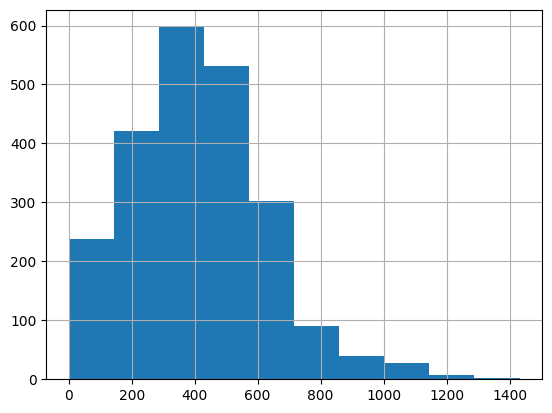

In [486]:
# Cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
## Calcular la cantidad de minutos usados por cada usuario al mes
total_minutes_user = df_calls.groupby(["user_id", "month"])["call_duration_minutes"].sum().reset_index().sort_values(by=["user_id", "month"],ascending=[True, True])

## Renombrar columna 
total_minutes_user = total_minutes_user.rename(columns={"call_duration_minutes": "total_minutes"})

## Visualización del df
print(total_minutes_user.head(20))
print()

total_minutes_user["total_minutes"].hist()

plt.show()

In [471]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



In [472]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [473]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



In [474]:
# Añade la información de la tarifa



[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [475]:
# Calcula el ingreso mensual para cada usuario



### Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

#### Llamadas

In [476]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



In [477]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [478]:
# Calcula la media y la varianza de la duración mensual de llamadas.



In [479]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

#### Mensajes

In [480]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



In [481]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

#### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

### Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Pruebas de hipótesis

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [482]:
# Prueba las hipótesis



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [483]:
# Prueba las hipótesis



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]